In this notebook, we will do some basic data analyses. As a basis, we will use a synthetic data set containing biographical and medicinal information of 10.000 persons.

# 0. Python and data primer

## 0.1. Python primer

In this section we will provide a concise overview of the Python language, to enable you to get started. The '#' sign is used to start a comment in Python, that lasts until the end of the line. The 'print()' command can be used to print output. The 'type()' command shows the type of its argument. Python indexing always starts at 0. For more information about Python, please refer to https://docs.python.org/3/reference/index.html.

### Primitive types
First, lets go over some primitive types in Python: integers (whole numbers), floats (real numbers), booleans (true/false) and strings (text).

In [1]:
# integers
a = 1
print(type(a))
print(a)

<class 'int'>
1


In [2]:
# floats
b = 1.0
type(b)
print(b)

1.0


In [3]:
# booleans
c = True
print(type(c))
print(c)
d = a == 2
print(d)

<class 'bool'>
True
False


In [4]:
# string
s = 'We are the knights who say "Ni!"'
print(type(s))
print(s)
s2 = s + ' And we demand a shrubbery!'
print(s2)

<class 'str'>
We are the knights who say "Ni!"
We are the knights who say "Ni!" And we demand a shrubbery!


### Built-in basic data types

Python has a number of built-in data types, including lists, dictionaries and sets. We will briefly go over the uses and syntax of each of these.

A *list* is an ordered sequence of values, not necessarily of the same type. Lists can be initialized via square brackets [].

In [5]:
l = [1, 'blah', 2.0, True]
print(type(l))
print(l)

# iterate over list
for i in l:
    print(i)
    
# add element to a list
l.append(5)
print(l)

# list slicing: print the first 3 elements
print(l[0:3])

# length of the list: use the len() function
print(len(l))

<class 'list'>
[1, 'blah', 2.0, True]
1
blah
2.0
True
[1, 'blah', 2.0, True, 5]
[1, 'blah', 2.0]
5


A *dictionary* (dict) is a container that maps (unique) keys to values, and is typically initialized using curly brackets {}.

In [6]:
d = {'a': 1, 'b': 2}
print(type(d))
print(d)

# get item 'a' from the dictionary
print(d['a'])

# length of the dictionary
print(len(d))

# iterate over the dictionary
# note that the ordering is not necessarily as initialized
for k, v in d.items():
    print('key %s mapped to value %d' % (k, v))

<class 'dict'>
{'a': 1, 'b': 2}
1
2
key a mapped to value 1
key b mapped to value 2


A *set* is a container for distinct values, and can be initialized via the *set()* function.

In [7]:
s1 = set([1, 2, 3, 3])
print(type(s1))
print(s1)

s2 = set([3, 4, 5])
print(s2)

# set union
s3 = s1.union(s2)
print(s3)

# set difference
s4 = s1.difference(s2)
print(s4)

<class 'set'>
{1, 2, 3}
{3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2}


### Various useful functions

The 'help()' function can be used to open the documentation of a certain function or data type.

In [8]:
# 1.0 represents a float object
help(1.0)

Help on float object:

class float(object)
 |  float(x) -> floating point number
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      float.__format__(format_spec) -> string
 |      
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getformat__(...) from builtins.type
 |      float.__getformat__(typestr) -> string
 |      
 |      You probably don't want to use thi

In [9]:
# map() is a built-in function
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



List comprehensions provide an elegant way to create or transform iterables.

In [10]:
# to see what range() does, use help(range)
a = [5 * i for i in range(5)]
print(a)
b = [x - 1 for x in a]
print(b)

[0, 5, 10, 15, 20]
[-1, 4, 9, 14, 19]


The next step is importing libraries and/or data. Python has a wealth of libraries that provide well-documented functions we can use for data analysis. In particular, we will use 'NumPy' (numerical support, esp. linear algebra), 'scikit-learn' (machine learning), 'pandas' (statistics) and matplotlib (plotting). A library can be loaded using the 'import' command and renamed via 'import x as y'. To call function x from library y, we use y.x().

In [11]:
import numpy as np # numpy
import sklearn # scikit-learn
import pandas as pd # pandas

#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib

## 0.2 The data set

We will use a synthetic data set based on health expenditure data. The data is organized as a matrix, and contains biographical information, class labels and information about drug purchases.

For your convenience, we created a small library for loading the data and some convenience functions. We will load the library as 'ibd4h'.

In [26]:
import ibd4health as ibd4h
data = ibd4h.data
features = ibd4h.features
labels = ibd4h.labels
colidx = ibd4h.colidx

The following variables are important:
- **data**: the data matrix, rows correspond to patients, columns to features
- **features**: the list of features (corresponding to columns in ibd4h.data)
- **labels**: the labels for patients (corresponding to rows, True: diabetic, False: non-diabetic)
- **colidx**: a dictionary to facilitate retrieving columns from their string definitions

In [13]:
print("Data set contains info on %d patients with %d features." 
      % data.shape)
print("Feature list has %d entries." 
      % features.shape)
print("Label list has %d entries, of which %d are positive." 
      % (labels.shape[0], sum(labels)))

Data set contains info on 10000 patients with 1097 features.
Feature list has 1097 entries.
Label list has 10000 entries, of which 5000 are positive.


The features in this data set include age, gender the volume of drugs purchased by the patient. Lets have a look at the first 3 features.

In [14]:
for idx, feat in enumerate(features[:3]):
    print('feature %d: %s' % (idx, feat))

feature 0: b'age'
feature 1: b'gender'
feature 2: b'A01AA01'


Drug volumes are categorized via codes of the anatomical therapeutic chemical (ATC) classification system (cfr. http://www.whocc.no/atc_ddd_index/ for details). You can find a description of ATC code XXX in the data set at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=XXX. For example, information on the third feature 'A01AA01', can be found at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=A01AA01.

The data matrix can be indexed via `data[rowidx, colidx]`. For example, the age of the first patient:

In [15]:
ageidx = colidx['age']
age = data[0, ageidx]
print(age)

73.4415943908


For slicing, replace either rowidx or colidx with ":". For example, to get a vector of all ages, we can use:

In [16]:
ages = data[:, ageidx]
print(ages.shape)
print('Average age: %1.3f' % np.mean(ages))
print('Minimum age: %1.3f' % np.min(ages))
print('Maximum age: %1.3f' % np.max(ages))

(10000,)
Average age: 67.517
Minimum age: 49.323
Maximum age: 94.330


# 1. Exploratory analysis

In [35]:
genderidx = colidx['gender']
# create a list of gender indicators via list comprehension
genders = list(data[:, genderidx])

# define gender representation
male = 0.0
female = 1.0

num_males = genders.count(male)
num_females = genders.count(female)
print('Data set contains %d males and %d females.' % (num_males, num_females))

# gender distribution in diabetics
positive_rowidx = [idx for idx, label in enumerate(labels) if label]
print(len(positive_rowidx)) # sanity check: length of this list should be 5000
positive_genders = [x > 0 for x in data[positive_rowidx, genderidx]]

num_positive_males = positive_genders.count(male)
num_positive_females = positive_genders.count(female)
print('Data set contains %d positive males and %d positive females.' % (num_positive_males, num_positive_females))

Data set contains 5000 males and 5000 females.
5000
Data set contains 2500 positive males and 2500 positive females.


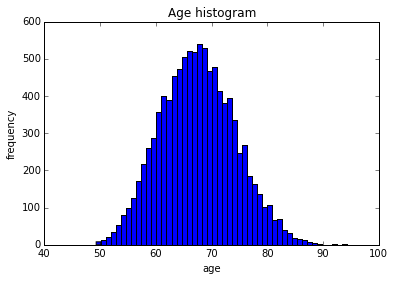

In [36]:
plt.hist(data[:, ageidx], bins=50)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age histogram')

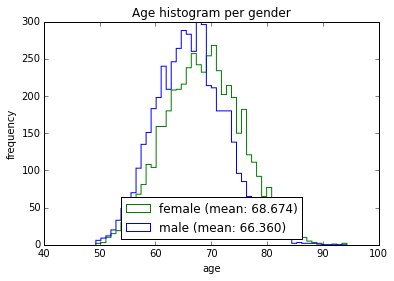

In [40]:
# create a mask to identify males and females in the data
male = data[:, colidx['gender']] == 0.0
female = np.invert(male)

# create vectors of ages
male_ages = data[male, ageidx]
female_ages = data[female, ageidx]

# plot histograms of age vectors
plt.hist((male_ages, female_ages), bins=50, histtype='step')
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend(['female (mean: %1.3f)' % np.mean(female_ages),
            'male (mean: %1.3f)' % np.mean(male_ages)],
          loc='lower center')
plt.title('Age histogram per gender')

# 2. Simple predictive modelling

5000.0

# 3. Feature selection

# 5. Constructing a machine learning pipeline